# Fake News Detection - Mini Project


- First thing that i need is the dataset to work on
- Therefor, to get the dataset I'm using the gdown google drive module to download a dataset (also available from kaggle)


In [1]:
# pip install gdown

In [2]:
# download from Google Drive
# gdown "https://drive.google.com/uc?id=178f_VkNxccNidap-5-uffXUW475pAuPy&confirm=t"

<i> commented out after executing from system console and since no longer required </i> <br>

After unzipping we get the following files:
1. train.csv
2. test.csv
3. submit.csv

We need to train the model therefore we will use the train.csv file

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Reading the Dataset:

In [2]:
news = pd.read_csv( 'train.csv')

In [3]:
print( 'Shape of news: ', news.shape )
print( 'Columns in dataset: ', news.columns )

Shape of news:  (20800, 5)
Columns in dataset:  Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


#### Viewing the dataset:

In [6]:
news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
text_length = news.text.str.split().str.len()
text_length.describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text, dtype: float64

Unreliable: 1
Reliable:   0
1    10413
0    10387
Name: label, dtype: int64


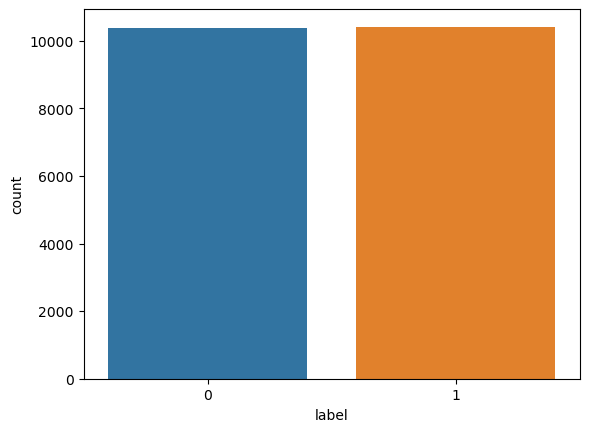

In [5]:
sns.countplot( data=news, x='label')
print('Unreliable: 1')
print('Reliable:   0')
print( news.label.value_counts() )


#### Normalizing the data:

In [10]:
normalized_data = round( news.label.value_counts(normalize=True), 3 ) * 100
normalized_data

1    50.1
0    49.9
Name: label, dtype: float64

#### Splitting the data into testing and training sets

In [6]:
x_train,x_test,y_train,y_test=train_test_split(news['text'].values.astype('U'), news.label, test_size=0.2, random_state=7)

### Initializing a TfidVectorizer

In [7]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

### Initializing a PassiveAggressive Classifier

In [13]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

### Checking Accuracy

In [29]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.49%


### Saving the model

In [8]:
import pickle

In [9]:
filename = 'TfidfVectorizer.sav'
pickle.dump( tfidf_vectorizer, open(filename, 'wb'))

In [31]:
filename = 'PassiveAggressiveClassifier.sav'
pickle.dump( pac, open(filename, 'wb'))

# Rough

In [19]:
article1 = news.text[0]
article1


'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [32]:
article2 = news.text[1]
article2

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [33]:
pac2 = pickle.load( open(filename, 'rb'))

In [34]:
str = tfidf_vectorizer.transform( [article1] )
pac2.predict(str)

array([1], dtype=int64)

In [37]:
str = tfidf_vectorizer.transform( [article2])
pac2.predict(str)

array([0], dtype=int64)